<a href="https://colab.research.google.com/github/simsekergun/ENEE691/blob/main/week09/Example_Make_Moons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $\color{ForestGreen}{\text{Make Moons Dataset}}$

In [1]:
# Importing basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Importing the other sklearn functions that will be used in this notebook
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# here are the libraries that we will be using for the first time
from sklearn import tree    # Importing 'tree' module from sklearn
import graphviz             # Importing 'graphviz' to graph the tree diagram

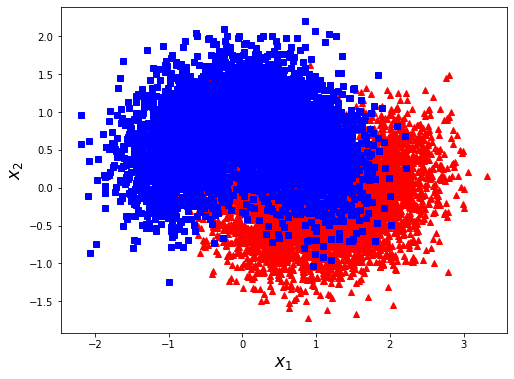

In [2]:
# Make a moon dataset with 10000 samples and some noise
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4)

plt.figure(figsize=(8, 6))
plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'r^')    # red is class=1
plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'bs')    # blue is class=0
plt.xlabel(r"$x_1$", fontsize=17)
plt.ylabel(r"$x_2$", fontsize=17)
plt.show()

In [3]:
# Breaking the data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [4]:
# Constructing tree classifier with no specified hyperparameters
tr_clf = tree.DecisionTreeClassifier()
tr_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [5]:
# Finding the predictions of tree classifier for train and test subsets
train_y_pred = tr_clf.predict(X_train)
test_y_pred = tr_clf.predict(X_test)

In [6]:
# Computing various classification evaluation metrics and presenting the classification report
train_score = metrics.accuracy_score(y_train, train_y_pred)   # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred)      # Compute test accuracy
train_report = classification_report(y_train, train_y_pred)   # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred)      # Generate classification report for test data

print('Decision Tree Train Classification Report: \n\n', train_report,'\n\n')
print('Decision Tree Test Classification Report: \n\n', test_report)

Decision Tree Train Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3774
           1       1.00      1.00      1.00      3726

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500
 


Decision Tree Test Classification Report: 

               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1226
           1       0.83      0.81      0.82      1274

    accuracy                           0.82      2500
   macro avg       0.82      0.82      0.82      2500
weighted avg       0.82      0.82      0.82      2500



In [7]:
# Using GridSearchCV to figure out the best values of the tree hyperparameters
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}

grid_search_cv = GridSearchCV(tree.DecisionTreeClassifier(random_state=3), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=3),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [8]:
# Displaying the best hyperparameters from 'params'

grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=15, random_state=3)

In [9]:
# Retraining the tree classifier (this time with best hyperparameters found above)

tr_clf = tree.DecisionTreeClassifier(max_leaf_nodes=19)
tr_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=19)

In [10]:
# Finding the predictions of tree classifier for train and test subsets

train_y_pred = tr_clf.predict(X_train)
test_y_pred = tr_clf.predict(X_test)

In [11]:
train_score = metrics.accuracy_score(y_train, train_y_pred)   # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred)      # Compute test accuracy
train_report = classification_report(y_train, train_y_pred)   # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred)      # Generate classification report for test data

print('Decision Tree Train Classification Report: \n\n', train_report,'\n\n')
print('Decision Tree Test Classification Report: \n\n', test_report)

Decision Tree Train Classification Report: 

               precision    recall  f1-score   support

           0       0.86      0.87      0.86      3774
           1       0.86      0.86      0.86      3726

    accuracy                           0.86      7500
   macro avg       0.86      0.86      0.86      7500
weighted avg       0.86      0.86      0.86      7500
 


Decision Tree Test Classification Report: 

               precision    recall  f1-score   support

           0       0.86      0.89      0.88      1226
           1       0.89      0.86      0.88      1274

    accuracy                           0.88      2500
   macro avg       0.88      0.88      0.88      2500
weighted avg       0.88      0.88      0.88      2500



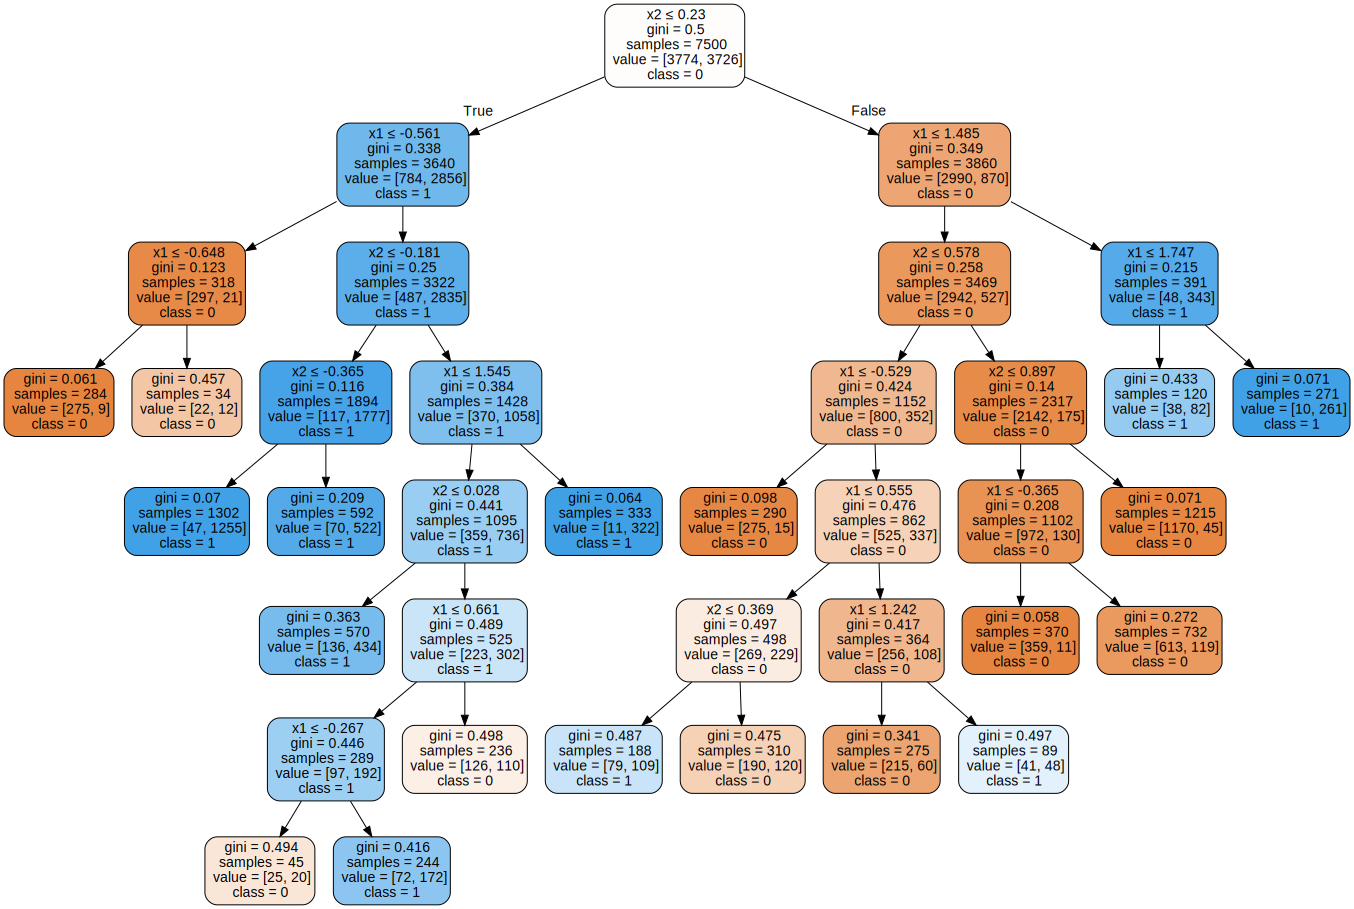

In [12]:
# Generating the tree graph
dot_data = tree.export_graphviz(tr_clf, out_file=None, 
                      feature_names=["x1", "x2"],  
                      class_names=['0', '1'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  

graph